In [1]:
import os
cwd = os.getcwd()
cwd

'/home/hannesr/dev/slo/cassandra-strict-slo/data_analysis'

In [33]:
# RESULTS_DIR = "../results" # This is the good version
# BENCHMARK = "mixShortload_julius_1000000ops"
# CLIENT_NAME = "Client1"

# RESULTS_DIR = "../results"
# BENCHMARK = "double_test_julius_"
# CLIENT_NAME = "Client1"

RESULTS_DIR = "../results" # This is the real version
BENCHMARK = "mix_shortload_julius_triplefinal_1000000ops_"
CLIENT_NAME = "Client1"


In [34]:
import os
for file in os.listdir(RESULTS_DIR):
    if file.startswith(BENCHMARK) and file.endswith(CLIENT_NAME):
        print(file)

mix_shortload_julius_triplefinal_1000000ops_0_Client1
mix_shortload_julius_triplefinal_1000000ops_10_Client1
mix_shortload_julius_triplefinal_1000000ops_1_Client1
mix_shortload_julius_triplefinal_1000000ops_20_Client1
mix_shortload_julius_triplefinal_1000000ops_30_Client1
mix_shortload_julius_triplefinal_1000000ops_40_Client1
mix_shortload_julius_triplefinal_1000000ops_5_Client1


In [35]:
mixload_files = list(map(lambda file: RESULTS_DIR + "/" + file,
                    filter(lambda file: 
                       file.startswith(BENCHMARK) and file.endswith(CLIENT_NAME),
                       os.listdir(RESULTS_DIR)
                    )))
mixload_files

['../results/mix_shortload_julius_triplefinal_1000000ops_0_Client1',
 '../results/mix_shortload_julius_triplefinal_1000000ops_10_Client1',
 '../results/mix_shortload_julius_triplefinal_1000000ops_1_Client1',
 '../results/mix_shortload_julius_triplefinal_1000000ops_20_Client1',
 '../results/mix_shortload_julius_triplefinal_1000000ops_30_Client1',
 '../results/mix_shortload_julius_triplefinal_1000000ops_40_Client1',
 '../results/mix_shortload_julius_triplefinal_1000000ops_5_Client1']

In [36]:
def get_percentiles(filename):
    file = open(filename, "r")
    lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

    # Remove everything before "Starting test"
    def get_line_with_find(lines, regex):
        for index, line in enumerate(lines):
            if line.find(regex) != -1:
                return index
        return -1

    test_index = get_line_with_find(lines, 'Starting test.')

    full_test = lines[test_index + 1:]
    
    read_test_lines = list(
        filter(lambda line: line.find("[READ]") != -1, 
        filter(lambda line: line.find("Percentile") != -1, full_test)
    ))

    def get_tuple_from_line(line):
        parts = line.split(",")
        
        percentile_string = parts[1].strip()
        percentile = percentile_string.split("Percentile")[0].replace("th", "")
        percentile = float(percentile)
        
        latency_string = parts[2].strip()
        latency = int(latency_string)
        
        return percentile, latency
    
    return sorted(list(map(get_tuple_from_line, read_test_lines))[:25], key=lambda x: x[0])
    
#     print(get_tuple_from_line(read_test_lines[0]))
#     for line in read_test_lines:
#         print(line)
    
    
get_percentiles(mixload_files[0])

[(10.0, 1083),
 (20.0, 1219),
 (30.0, 1375),
 (40.0, 1566),
 (50.0, 1808),
 (60.0, 2123),
 (70.0, 2553),
 (80.0, 3281),
 (90.0, 5087),
 (95.0, 7563),
 (96.0, 8327),
 (97.0, 9263),
 (98.0, 10647),
 (99.0, 13471),
 (99.1, 13999),
 (99.2, 14567),
 (99.3, 15207),
 (99.4, 15935),
 (99.5, 16847),
 (99.6, 18159),
 (99.7, 19935),
 (99.8, 23039),
 (99.85, 25599),
 (99.89, 28783),
 (99.9, 29583)]

In [37]:
def get_cdf_for_file(filename):
    threshold = filename.split(BENCHMARK)[1].split("_")[0]
    return threshold, get_percentiles(filename)
    
get_cdf_for_file(mixload_files[0])

('0',
 [(10.0, 1083),
  (20.0, 1219),
  (30.0, 1375),
  (40.0, 1566),
  (50.0, 1808),
  (60.0, 2123),
  (70.0, 2553),
  (80.0, 3281),
  (90.0, 5087),
  (95.0, 7563),
  (96.0, 8327),
  (97.0, 9263),
  (98.0, 10647),
  (99.0, 13471),
  (99.1, 13999),
  (99.2, 14567),
  (99.3, 15207),
  (99.4, 15935),
  (99.5, 16847),
  (99.6, 18159),
  (99.7, 19935),
  (99.8, 23039),
  (99.85, 25599),
  (99.89, 28783),
  (99.9, 29583)])

In [38]:
cdfs = list(map(get_cdf_for_file, mixload_files))
cdfs

[('0',
  [(10.0, 1083),
   (20.0, 1219),
   (30.0, 1375),
   (40.0, 1566),
   (50.0, 1808),
   (60.0, 2123),
   (70.0, 2553),
   (80.0, 3281),
   (90.0, 5087),
   (95.0, 7563),
   (96.0, 8327),
   (97.0, 9263),
   (98.0, 10647),
   (99.0, 13471),
   (99.1, 13999),
   (99.2, 14567),
   (99.3, 15207),
   (99.4, 15935),
   (99.5, 16847),
   (99.6, 18159),
   (99.7, 19935),
   (99.8, 23039),
   (99.85, 25599),
   (99.89, 28783),
   (99.9, 29583)]),
 ('10',
  [(10.0, 1090),
   (20.0, 1231),
   (30.0, 1398),
   (40.0, 1574),
   (50.0, 1791),
   (60.0, 2061),
   (70.0, 2347),
   (80.0, 2837),
   (90.0, 3879),
   (95.0, 5507),
   (96.0, 6255),
   (97.0, 7095),
   (98.0, 8535),
   (99.0, 11239),
   (99.1, 11703),
   (99.2, 12215),
   (99.3, 12823),
   (99.4, 13623),
   (99.5, 14551),
   (99.6, 15727),
   (99.7, 17231),
   (99.8, 19471),
   (99.85, 21327),
   (99.89, 23647),
   (99.9, 24399)]),
 ('1',
  [(10.0, 1058),
   (20.0, 1172),
   (30.0, 1290),
   (40.0, 1427),
   (50.0, 1592),
   (60.0, 

In [40]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [42]:
def get_cdfs_y(i):
    y = []
    lol = cdfs[i]
    for x in lol[1]:
        y.append(x[1])
    return y
i = 0
lol = cdfs[0]
x_axis = []
for x in lol[1]:
    x_axis.append(x[0])
print(x_axis)
y_0 = []
y_0 = get_cdfs_y(0)
print(y_0)
y_10 = get_cdfs_y(1)
print(y_10)
y_1 = get_cdfs_y(2)
print(y_1)
y_20 = get_cdfs_y(3)
print(y_20) 
y_30 = get_cdfs_y(4)
print(y_30)
y_40 = get_cdfs_y(5)
print(y_40)
y_5 = get_cdfs_y(6)
print(y_5)

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 96.0, 97.0, 98.0, 99.0, 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.85, 99.89, 99.9]
[1083, 1219, 1375, 1566, 1808, 2123, 2553, 3281, 5087, 7563, 8327, 9263, 10647, 13471, 13999, 14567, 15207, 15935, 16847, 18159, 19935, 23039, 25599, 28783, 29583]
[1090, 1231, 1398, 1574, 1791, 2061, 2347, 2837, 3879, 5507, 6255, 7095, 8535, 11239, 11703, 12215, 12823, 13623, 14551, 15727, 17231, 19471, 21327, 23647, 24399]
[1058, 1172, 1290, 1427, 1592, 1811, 2187, 2605, 3875, 6011, 6767, 7779, 9191, 11959, 12431, 12975, 13575, 14255, 15151, 16255, 17759, 20159, 21871, 23727, 24351]
[1146, 1282, 1426, 1605, 1796, 2013, 2315, 2789, 3891, 5955, 6759, 7791, 9239, 12111, 12575, 13071, 13655, 14383, 15319, 16319, 17855, 19999, 21567, 23215, 23871]
[1071, 1180, 1308, 1491, 1713, 1989, 2347, 3035, 4823, 7371, 8095, 9071, 10607, 13823, 14375, 14951, 15607, 16359, 17295, 18511, 20175, 22847, 24975, 27647, 28559]
[1139, 1320, 1487, 1665, 1862,

<IPython.core.display.Javascript object>


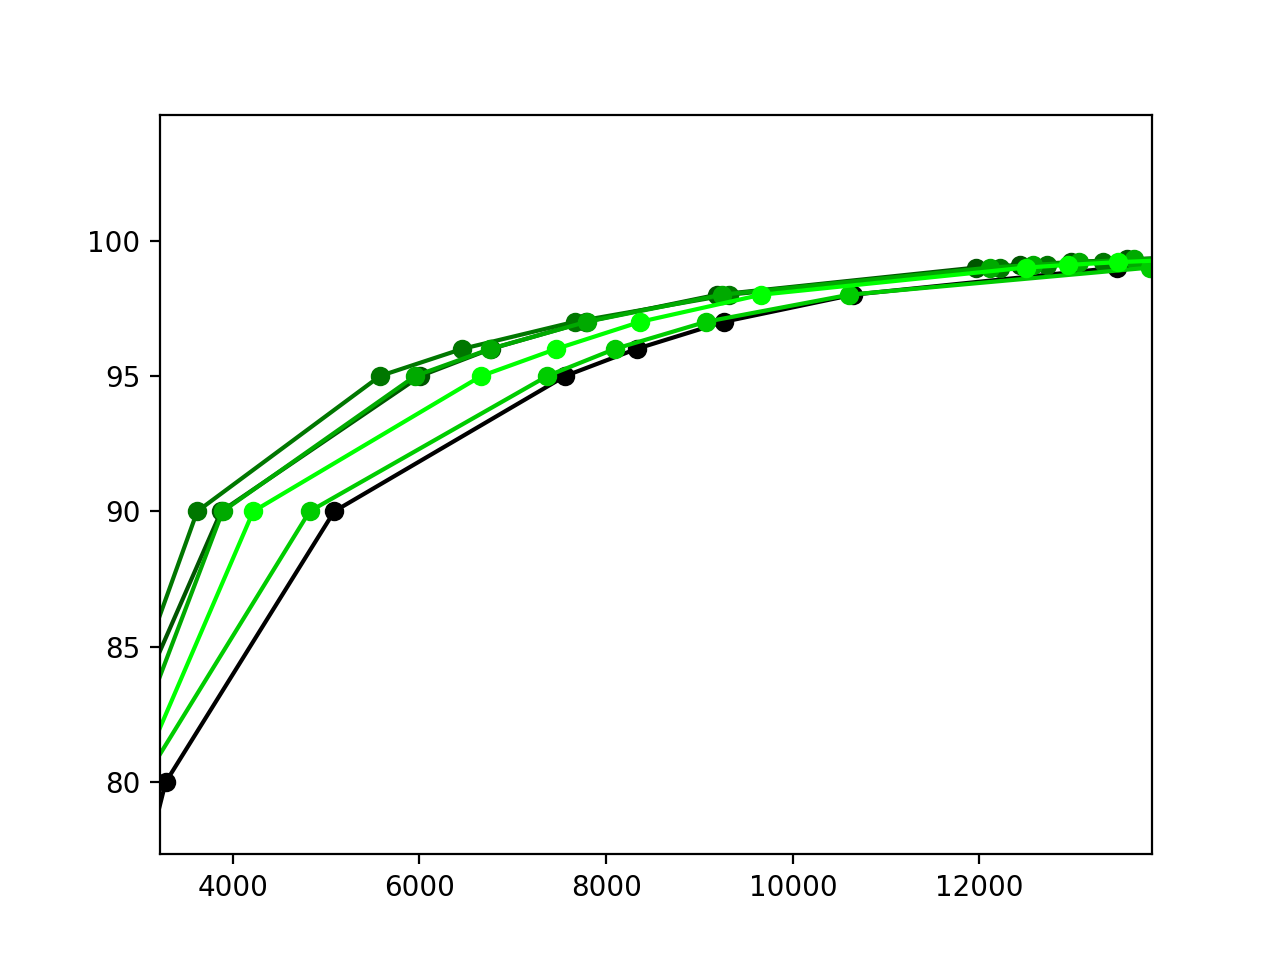

In [43]:
plt.plot(y_0, x_axis,'-ok', color="black")
# plt.plot(y_1,x_axis,'-or', color="red")
plt.plot(y_1,x_axis,'-ok', color="#005500")
plt.plot(y_5,x_axis,'-ok', color="#007700")
# plt.plot(y_10,x_axis,'-ok', color="#009900")
plt.plot(y_20,x_axis,'-ok', color="#00aa00")
# plt.plot(y_10,x_axis,'-oc')
# plt.plot(y_20,x_axis,'-oy', color="green")
#plt.plot(y_30,x_axis,'k')
plt.plot(y_30,x_axis,'-ok', color="#00cc00")
plt.plot(y_40,x_axis,'-ok', color="#00ff00")

# 1, 5, 10, 20, 30, 40

plt.show()

In [35]:
with open("mixed-workload-cdf-2.csv", "w") as f:    
    f.write("x, sr_0, sr_1, sr_5, sr_10, sr_20, sr_30, sr_40\n")
    for v in zip(x_axis, y_0, y_1, y_5, y_10, y_20, y_30, y_40):
        f.write(str(v)[1:-1] + "\n")

In [45]:
import re
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

def get_timestamps(filename):
    file = open(filename, "r")
    lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

    # Remove everything before "Starting test"
    def get_line_with_find(lines, regex):
        line_index = -1
        for index, line in enumerate(lines):
            if line.find(regex) != -1:
                line_index = index
        return line_index


    body_index = get_line_with_find(lines, 'Starting test.')

    body = lines[body_index + 1:]
    
    # Get only data lines
    regex_pattern = re.compile(
        "^[0-9]{4}-(0[1-9]|1[0-2])-(0[1-9]|[1-2][0-9]|3[0-1]) (2[0-3]|[01][0-9]):[0-5][0-9]:[0-5][0-9]:[0-9]{3}")
    data_lines = list(filter(regex_pattern.match, body))
    
    # Get first and last line
    first_line = data_lines[0]
    last_line = data_lines[-1]

    # Parse the timestamps
    start_time_string = first_line.split()[0] + ' ' + first_line.split()[1][:12]
    end_time_string = last_line.split()[0] + ' ' + last_line.split()[1][:12]
    
    return (start_time_string, end_time_string)
    
def get_cassandra_metrics(filename, node_id=0):
    metrics_file = "_".join(filename.split("_")[:-1]) + "_metrics"
    
    files = list(map(lambda file: metrics_file + "/" + file,
                    filter(lambda file: 
                       file.startswith(CLIENT_NAME),# and file.endswith("Client1"),
                       os.listdir(metrics_file + "/")
                    )))
    
    metrics_df_node1 = pd.read_csv(files[node_id], parse_dates=True, infer_datetime_format=True, skipinitialspace=True)
    metrics_df_node1 = metrics_df_node1.dropna(axis='columns', how='all')
    
    
    start_time_string, end_time_string = get_timestamps(filename)
    
    print(start_time_string, end_time_string)
    print(files)
    
    in_benchmark = (metrics_df_node1['Timestamp'] > start_time_string)# & (metrics_df_node1['Timestamp'] < end_time_string)
    metrics_df_node1 = metrics_df_node1[in_benchmark]
    
    metrics_df_node1['ReadThroughput'] = metrics_df_node1['ReadCount'] - metrics_df_node1['ReadCount'].shift(1)
    metrics_df_node1['WriteThroughput'] = metrics_df_node1['WriteCount'] - metrics_df_node1['WriteCount'].shift(1)

    metrics_df_node1 = metrics_df_node1.fillna(0)
    
#     metrics_df_node1['SRDelay'][0] = 0


    return metrics_df_node1
    
    

    
metrics_df_node1 = get_cassandra_metrics(mixload_files[0])

metrics_df_node1


2019-12-13 13:12:50:057 2019-12-13 13:21:14:889
['../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.11', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.12', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.13', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.14']


,Timestamp,MemoryUsed,ReadLatency1,ReadCount,WriteLatency1,WriteCount,PendingTasks,WaitingOnCommit1,SRDelay,ReadThroughput,WriteThroughput
0,2019-12-13 13:12:53.443,187189248,0.000043,13,4.586733,514,0,0.0,596,0.0,0.0
1,2019-12-13 13:12:54.599,187189248,0.032022,13,4.219998,514,0,0.0,303,0.0,0.0
2,2019-12-13 13:12:55.699,189286400,0.032022,13,4.219998,514,0,0.0,157,0.0,0.0
3,2019-12-13 13:12:56.79,189286400,0.032022,13,4.219998,514,0,0.0,84,0.0,0.0
4,2019-12-13 13:12:57.877,190334976,0.032022,13,4.219998,514,0,0.0,47,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
480,2019-12-13 13:21:10.741,393504256,543.133402,305205,28.719001,16728,0,0.0,14,494.0,30.0
481,2019-12-13 13:21:11.769,405038592,543.133402,305717,28.719001,16748,0,0.0,10,512.0,20.0
482,2019-12-13 13:21:12.796,411330048,543.133402,305939,28.719001,16762,0,0.0,11,222.0,14.0
483,2019-12-13 13:21:13.826,411330048,543.133402,305939,28.719001,16762,0,0.0,11,0.0,0.0


Data for: ../results/mix_shortload_julius_triplefinal_1000000ops_30_Client1, node: 0
2019-12-10 14:43:21:920 2019-12-10 14:51:46:889
['../results/mix_shortload_julius_triplefinal_1000000ops_30_metrics/Client1_30_2000_100.0.0.11', '../results/mix_shortload_julius_triplefinal_1000000ops_30_metrics/Client1_30_2000_100.0.0.12', '../results/mix_shortload_julius_triplefinal_1000000ops_30_metrics/Client1_30_2000_100.0.0.13', '../results/mix_shortload_julius_triplefinal_1000000ops_30_metrics/Client1_30_2000_100.0.0.14']


<IPython.core.display.Javascript object>


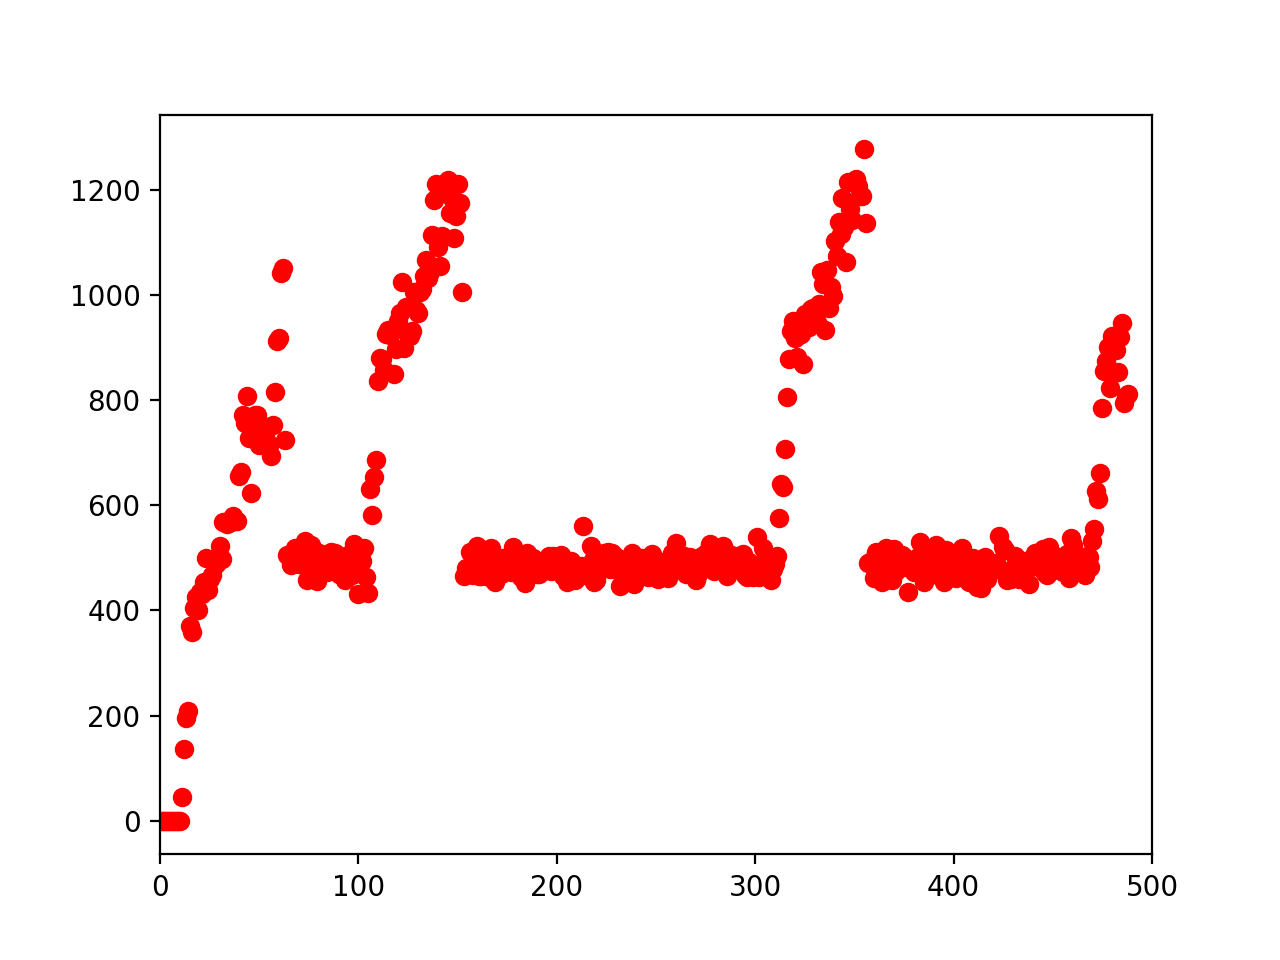

In [57]:
%matplotlib notebook
from matplotlib import pyplot as plt

# xmin = metrics_df_node1.index[0]
# xmax = metrics_df_node1.index[-1]

# print(xmin)
# print(xmax)

def scatter_plot(file, node):
    print("Data for: " + mixload_files[file] + ", node: " + str(node))
    node_data = get_cassandra_metrics(mixload_files[file], node)

    plt.xlim(0, 500)
    plt.scatter(range(len(node_data['ReadThroughput'])), node_data['ReadThroughput'], color="red")
    
#     node_data2 = get_cassandra_metrics(mixload_files[file], node+1)
#     plt.scatter(range(len(node_data2['ReadThroughput'])), node_data2['ReadThroughput'], color="blue")

    
    
def scatter_sr(node):
    print("Data for: " + mixload_files[0] + ", node: " + str(node))
#     node_data = get_cassandra_metrics(mixload_files[0], node)

#     plt.scatter(range(len(node_data['SRDelay'])), node_data['SRDelay'], color="red")
    
    node_data2 = get_cassandra_metrics(mixload_files[0], node)
    plt.ylim(0, 35)
    plt.xlim(0, 500)
    plt.plot(range(len(node_data2['SRDelay'])), node_data2['SRDelay'], color="blue", )
    
# scatter_plot(3, 2)
scatter_plot(4, 0)
# mixload_files

Data for: ../results/mix_shortload_julius_triplefinal_1000000ops_0_Client1, node: 0
2019-12-13 13:12:50:057 2019-12-13 13:21:14:889
['../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.11', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.12', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.13', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.14']


<IPython.core.display.Javascript object>


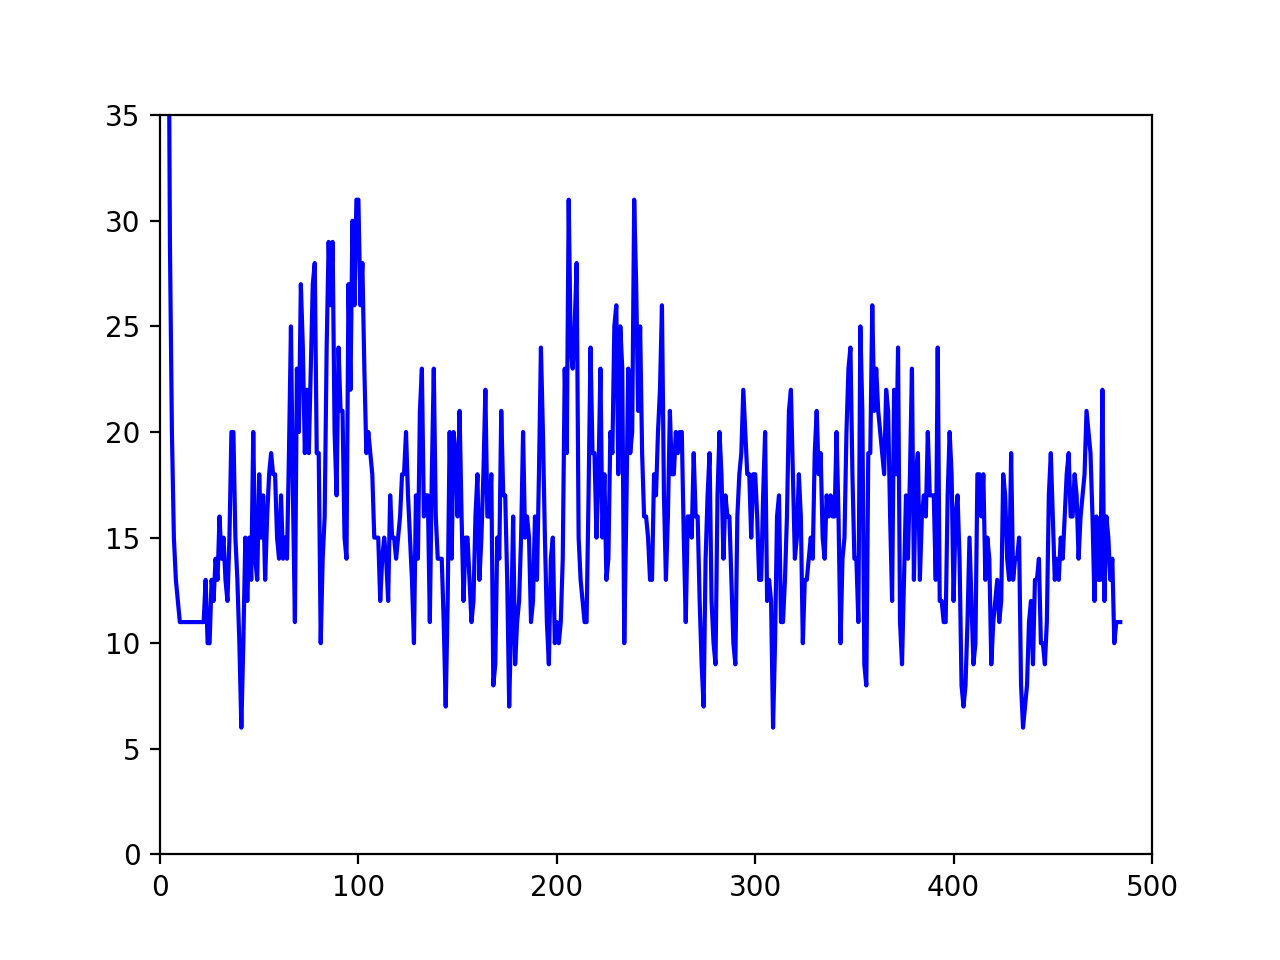

In [58]:
scatter_sr(0)
# a = get_cassandra_metrics(mixload_files[0], 0)
# t = get_cassandra_metrics(mixload_files[0], 0)
# t = t[t['SRDelay']< 2]

# print(len(a))
# print(len(t))

In [39]:
# Writing stuff to files
FILE_ID = 0

with open("mixed-workload.csv", "w") as f:
    node_data1 = get_cassandra_metrics(mixload_files[FILE_ID], 0)['ReadThroughput']
    node_data2 = get_cassandra_metrics(mixload_files[FILE_ID], 1)['ReadThroughput']
    node_data3 = get_cassandra_metrics(mixload_files[FILE_ID], 2)['ReadThroughput']
    node_data4 = get_cassandra_metrics(mixload_files[FILE_ID], 3)['ReadThroughput']
    
    avg = (node_data1 + node_data2 + node_data3 + node_data4) / 4
    var = ((node_data1 - avg)**2 + (node_data2 - avg)**2 + (node_data3 - avg)**2 + (node_data4 - avg)**2) / 4
    
    f.write("second, average, variance\n")
    for index, a, v in zip(range(len(node_data1)), avg, var):
        f.write(str(index) + ", " + str(a) + ", " + str(v) + "\n")
        
with open("mixed-workload-write.csv", "w") as f:
    node_data1 = get_cassandra_metrics(mixload_files[FILE_ID], 0)['WriteThroughput']
    node_data2 = get_cassandra_metrics(mixload_files[FILE_ID], 1)['WriteThroughput']
    node_data3 = get_cassandra_metrics(mixload_files[FILE_ID], 2)['WriteThroughput']
    node_data4 = get_cassandra_metrics(mixload_files[FILE_ID], 3)['WriteThroughput']
    
    avg = (node_data1 + node_data2 + node_data3 + node_data4) / 4
    var = ((node_data1 - avg)**2 + (node_data2 - avg)**2 + (node_data3 - avg)**2 + (node_data4 - avg)**2) / 4
    
    f.write("second, average, variance\n")
    for index, a, v in zip(range(len(node_data1)), avg, var):
        f.write(str(index) + ", " + str(a) + ", " + str(v) + "\n")

2019-12-10 13:47:26:291 2019-12-10 13:55:50:893
['../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.11', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.12', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.13', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.14']
2019-12-10 13:47:26:291 2019-12-10 13:55:50:893
['../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.11', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.12', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.13', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.14']
2019-12-10 13:47:26:291 2019-12-10 13:55:50:893
['../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.11', '../res

In [40]:
with open("sr-threshold-dynamic.csv", "w") as f:
    node_data1 = get_cassandra_metrics(mixload_files[0], 0)['SRDelay']
    
    f.write("second, sr\n")
    for index, v in zip(range(len(node_data1)), node_data1):
        f.write(str(index) + ", " + str(v) + "\n")

2019-12-10 13:47:26:291 2019-12-10 13:55:50:893
['../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.11', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.12', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.13', '../results/mix_shortload_julius_triplefinal_1000000ops_0_metrics/Client1_0_2000_100.0.0.14']
